In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Load image and convert to grayscale

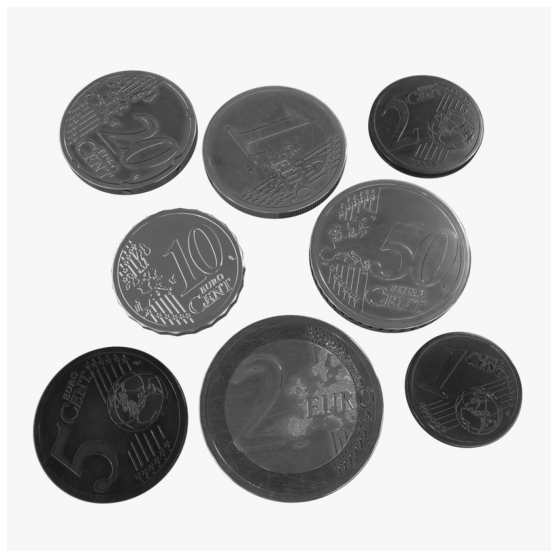

In [34]:
coins = cv2.cvtColor(cv2.imread('images/coins5.jpg'), cv2.COLOR_BGR2RGB)
coins_gray = cv2.cvtColor(cv2.imread('images/coins5.jpg'), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_gray, cmap='gray')

#### Apply a threshold -> need a binary image

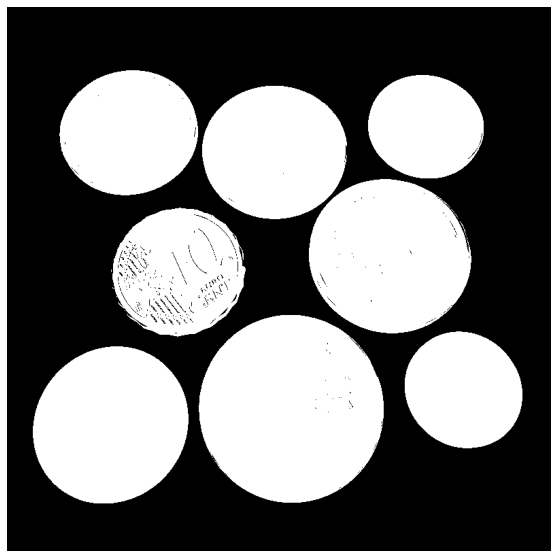

In [15]:
retval, threshold = cv2.threshold(coins_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(threshold, cmap='gray')

#### Find the contours and sort them

In [36]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

# sort contours
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

19


#### Use a copy of the original image to draw the contours

19


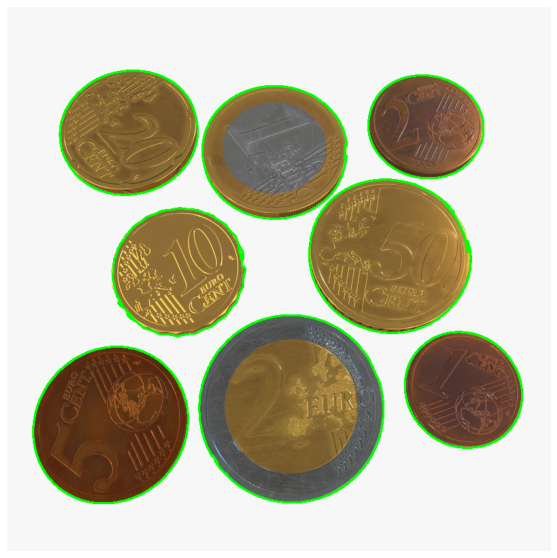

In [27]:
coins_copy = coins.copy()
cv2.drawContours(coins_copy, sorted_contours[0:8], -1, (0,255,0), 2) # 2=thickness

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_copy, cmap='gray')

#### Function for sorting contours in different ways

In [28]:
def sort_contours(contours, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to bottom
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    (contours, bounding_boxes) = zip(*sorted(zip(contours, bounding_boxes), 
                                             key=lambda b: b[1][i], 
                                             reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (contours, bounding_boxes)

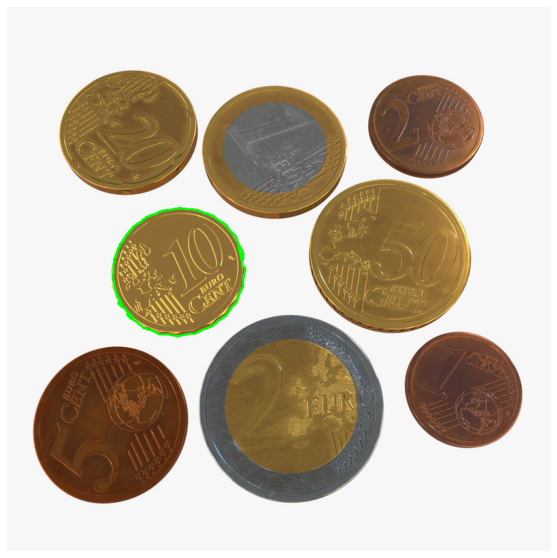

In [31]:
left_to_right_contours, bb = sort_contours(sorted_contours[0:9], method="left-to-right")

coins_copy = coins.copy()
cv2.drawContours(coins_copy, left_to_right_contours, 2, (0,255,0), 2) # 2=thickness

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(coins_copy, cmap='gray')

In [35]:
# calculates a contour perimeter
cv2.arcLength()